In [2]:
import numpy as np
from skmultiflow.drift_detection import ADWIN
import matplotlib.pyplot as plt

In this demo, an ADWIN object evaluates a sequence of numbers corresponding to 2 distributions. 
The ADWIN object indicates the indices where change is detected.

The first half of the data is a sequence of randomly generated 0's and 1's. 
The second half of the data is a normal distribution of integers from 0 to 7.

In [3]:
adwin = ADWIN()

In [4]:
size = 2000
change_start = 999

In [5]:
np.random.seed(1)
data_stream = np.random.randint(2, size=size)
data_stream[change_start:] = np.random.randint(8, size=size-change_start)

Text(0.5, 0, 'Index')

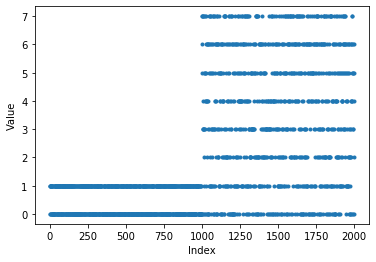

In [12]:
plt.plot(data_stream, ".")
plt.ylabel("Value")
plt.xlabel("Index")

In [7]:
for i in range(size):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))

Change has been detected in data: 0 - of index: 1023
Change has been detected in data: 5 - of index: 1055
Change has been detected in data: 3 - of index: 1087
Change has been detected in data: 1 - of index: 1151


In [8]:
ch_index = [1023,1055,1087,1151]
change_values = [data_stream[i] for i in ch_index]

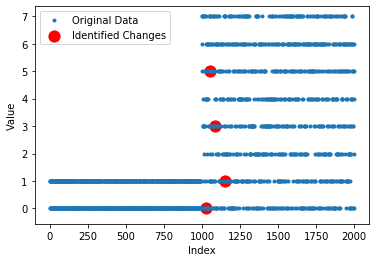

In [22]:
plt.plot(data_stream, ".", label='Original Data');
plt.scatter(ch_index, change_values, s=500, marker=".", color='r', label='Identified Changes');
plt.ylabel("Value")
plt.xlabel("Index")
plt.legend(loc="upper left")